# Praca domowa 6
## Michał Wdowski


Najpierw zaimportujmy dane i przyjrzyjmy się im

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("../../clustering_R3.csv", header = 0)
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


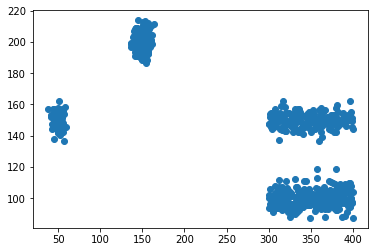

In [12]:
plt.scatter(data["X1"], data["X2"])

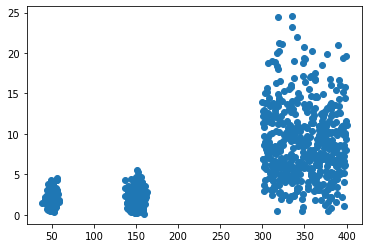

In [13]:
plt.scatter(data["X1"], data["X3"])

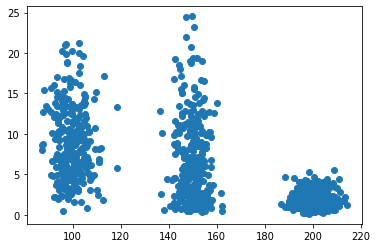

In [14]:
plt.scatter(data["X2"], data["X3"])

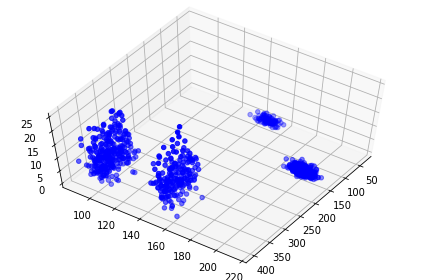

In [45]:
from mpl_toolkits import mplot3d

def plot_results(data, labels = 'blue'):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.scatter3D(data["X1"], data["X2"], data["X3"], c = labels)
    ax.view_init(60, 35)
    
    plt.tight_layout()

    plt.show()
    
plot_results(data)

Na oko powinny być 4 klastry o znacząco różnych rozrzutach, niestety ich liczność nie jest widoczna - być może mają tę samą liczbę punktów, być może inną, zobaczymy.

Warto jednak dodatkowo znormalizować dane:

In [75]:
from sklearn import preprocessing

x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)


In [78]:
data.columns = ["X1", "X2", "X3"]
data.head()

,X1,X2,X3
0,0.314214,0.873502,0.039760
1,0.296070,0.906832,0.107066
2,0.323520,0.875180,0.021112
3,0.309541,0.943819,0.022997
4,0.308086,0.932828,0.140531


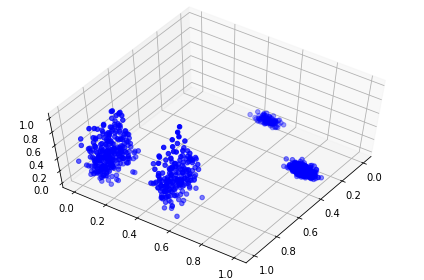

In [79]:
plot_results(data)

In [ ]:
Wykorzystam dwie metryki: silhouette i indeks Calińskiego-Harabasza.

## k-means

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

### Silhouette score

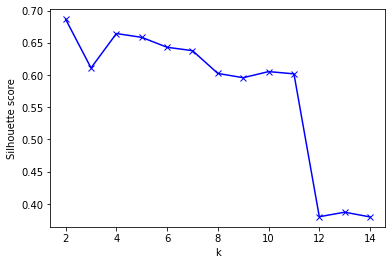

In [81]:
sil_scores = []
kmeans_labels = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=2137)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    kmeans_labels.append(labels)
    # plot_results(data, labels)
    sil_scores.append(silhouette_score(data, labels))
    
def plot_scores(scores, y_label):
    plt.plot(range(2, 15), scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel(y_label)
    plt.show()
    
plot_scores(sil_scores, 'Silhouette score')

Wygląda na to, że wg. k-means z miarą silhouette, odpowiednią liczbą klastrów jest 2. Wygląda to tak:

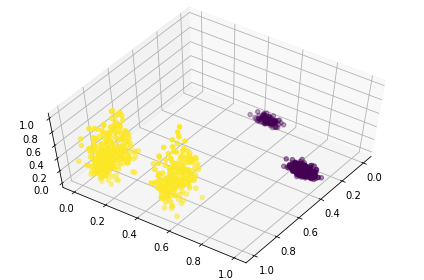

In [83]:
plot_results(data, kmeans_labels[0])

Jednak warto zauważyć, że 4 to druga najlepsza wartość. Rysunek dla niej wygląda tak:

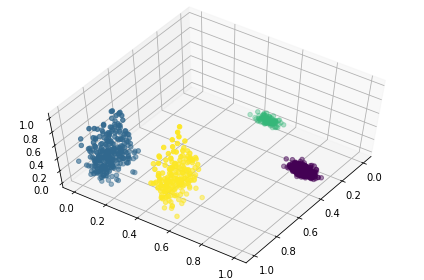

In [84]:
plot_results(data, kmeans_labels[2])

Co wyszło właściwie tak, jakbyśmy tego chcieli.

### Caliński-Harabasz score

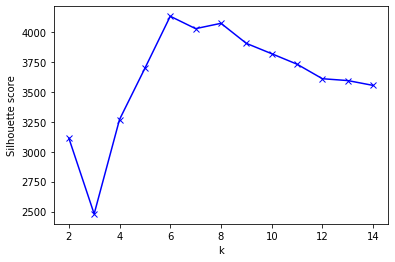

In [85]:
chs_scores = []
kmeans_labels = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=2137)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    kmeans_labels.append(labels)
    # plot_results(data, labels)
    chs_scores.append(calinski_harabasz_score(data, labels))
    
def plot_scores(scores, y_label):
    plt.plot(range(2, 15), scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel(y_label)
    plt.show()
    
plot_scores(chs_scores, 'Silhouette score')

Tu najlepsza jest wartość maksymalna, więc wg. tego indeksu najlepsze jest 6 klastrów:

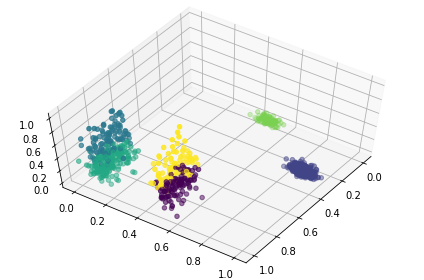

In [92]:
plot_results(data, kmeans_labels[4])

## GMM

In [72]:
from sklearn.mixture import GaussianMixture

### Silhouette

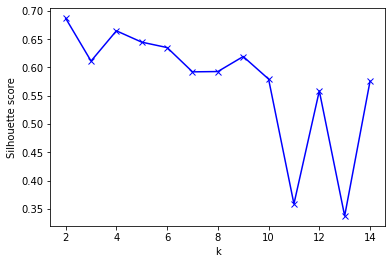

In [93]:
sil_scores = []
gmm_labels = []
for k in range(2, 15):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    gmm_labels.append(labels)
    # plot_results(data, labels)
    sil_scores.append(silhouette_score(data, labels))
    
def plot_scores(scores, y_label):
    plt.plot(range(2, 15), scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel(y_label)
    plt.show()
    
plot_scores(sil_scores, 'Silhouette score')

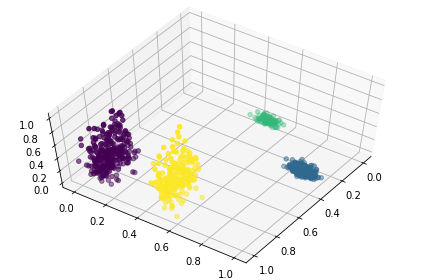

In [95]:
plot_results(data, gmm_labels[2])

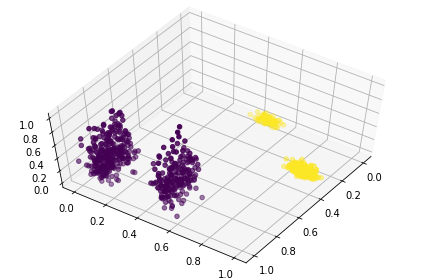

In [96]:
plot_results(data, gmm_labels[0])

Sytuacja jest identyczna jak w k-means. Silhouette najlepiej ocenił podział na 2 klastry, mimo że 4 wydaje się być lepszy, a dodatkowo gmm radzi sobie idealnie z podziałem na 4.

### Caliński-Harabasz score

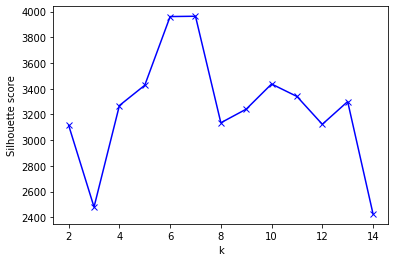

In [97]:
chs_scores = []
gmm_labels = []
for k in range(2, 15):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    gmm_labels.append(labels)
    # plot_results(data, labels)
    chs_scores.append(calinski_harabasz_score(data, labels))
    
def plot_scores(scores, y_label):
    plt.plot(range(2, 15), scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel(y_label)
    plt.show()
    
plot_scores(chs_scores, 'Silhouette score')

Tu znowu 6 jest oceniane najlepiej:

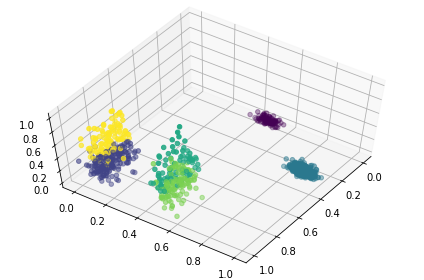

In [99]:
plot_results(data, gmm_labels[4])

Mimo że podział na 4 jest prawidłowy:

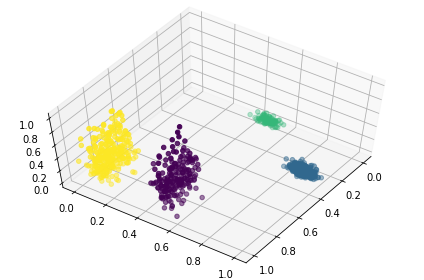

In [100]:
plot_results(data, gmm_labels[2])